Lambda School Data Science

*Unit 4, Sprint 3, Module 1*

---


# Recurrent Neural Networks (RNNs) and Long Short Term Memory (LSTM) (Prepare)

![](https://wiki.tum.de/download/attachments/22578349/GATES.gif?version=1&modificationDate=1486083227237&api=v2)

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras

-----
# Overview

### Let's start with sequences 

A sequence is just any collection of numbers - order counts and repetition is allowed. 

Python lists are a good elemental example - `[1, 2, 2, -1]` is a valid list and is different from `[1, 2, -1, 2]`. 

What you might not be as familiar with are recusive numbers. For that, let's talk about a specific example, namely the **Fibonacci Sequence**.


# Neural Networks for Sequences (Learn)



Before we dive into the inner workings of an LSTM model, let's try to understand and appreciate the recusive relationships of numbers in both pure mathematics and in the physical reality in which we find ourselves embedded. 


As usually we take attempt to understand a concept from at least 3 different perspectives:
- Algebraic
- Geometric
- Coding an example


A [**recurrence relation**](https://en.wikipedia.org/wiki/Recurrence_relation) in math is an equation that uses recursion to define a sequence of numbers - a famous example is the Fibonacci numbers.

Here is the algorithm for generating the numbers in the Fibonacci sequence: 

$$F_n = F_{n-1} + F_{n-2}$$

You need a base case $F_0=1, F_1=1$ (i.e. a starting point) to get the sequence started and then from then on our the sequence is self-generating. 

So this means that we can start generating our sequence: 

$$F_0=1,~~  F_1=1 $$

$$F_2 = F_{1} + F_{0} ~=~ 1 + 1 ~=~ 2$$

Then

$$F_3 = F_{2} + F_{1} ~=~ 2 + 1 ~=~ 3$$

Then 

$$F_4 = F_{3} + F_{2} ~=~ 3 + 2 ~=~ 5$$

Then 

$$F_5 = F_{4} + F_{3} ~=~ 5 + 3 ~=~ 8$$

I hope you get the idea. 

Before we we code up this sequence, let's appreciate how important and ubiquitous it is in nature. 

![](http://www.davidbeahm.com/wp-content/uploads/2011/11/fibonacci-1024x637.jpg)


![](https://i.pinimg.com/originals/32/d7/47/32d747bea24f4756dc4c5ffe61b36efd.jpg)

![](https://i.pinimg.com/originals/f2/cb/34/f2cb3452dd774bab87bbee2b8a77d4bb.png)


![](https://f4.bcbits.com/img/a3628582449_10.jpg)

**Take Away:** 
- Recursive sequences are located everywhere in life - but we need to know what we're looking for and where to look for it. 
- Simply try to develop an appreciation for the connection between mathematics and all of physical reality. 

### Code up the Fibonacci Sequence
Again, here is the algorithm for the Fibonacci numbers.  


$$F_n = F_{n-1} + F_{n-2}$$


You need a base case to get your sequence started. This time let  $F_0=0 ~\text{and}~ F_1=1$. 


In [1]:
def fibo(n):
    """
    Calculate and return the next number in the Fibonacci sequence
    
    Input
    -----
    n: int or float
        The nth number in the sequence (think of it as an index for a list)
        
    Return
    ------
    F_n: the next number in the sequence generated from the previous two numbers in the sequence 
    """
    
    if n <= 1:
        # if n = 0, then return 0 
        return n
    else:
        # this is the recursive part 
        # notice how the function is a function of itself!
        #  F_n =       F_n-1 + F_n-2
        return(fibo(n-1) + fibo(n-2))

In [3]:
# generate a Fibonacci Sequence
len_of_seq = 8
[fibo(n) for n in range(len_of_seq)]

[0, 1, 1, 2, 3, 5, 8, 13]

**Take Away:** 

Recursive algorithms have as input their previous output. In order words, the output at time step `t - 1`, becomes in the input in the following time step `t`. This is the key idea of that you should observe. Because it is this recursive behavior that is new to how we will think about neural networks, specifically the LSTM model. 

-----

## Introduction to Recursive Neural Networks (RNNs) 


The nice thing about spending time to understand the Fibonacci Sequence is that we can then `borrow the intuition` that we picked up to help us understand how the LSTM works. 

Different Recursive Neural Networks (RNNs) have this recursive loop in their architecture. The ML research community first created the following RNN model using the standard Fully-Connected Forward Feeding (FCFF) model: 

![](https://nerdthecoder.files.wordpress.com/2019/02/731df-0mrhhgabskajpbt21.png)

`This type of RNN had severe limitations!` 

- It didn't have long-term memory capacity to learn long input sequences 
- It suffered from the [Vanishing Gradient Problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

In response to these limitations, the ML research community created the LSTM model, which ditched the FCFF architecture and started using the following architecture:

![Long short-term memory unit](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Long_Short-Term_Memory.svg/1024px-Long_Short-Term_Memory.svg.png)

Wow! Ok! There's a lot going on here, isn't there? Well, don't worry, we are going to break this model down bit-by-bit so we can understand what is happening. 

_____


## Theory of LSTM

One of the simplist and clearest explanations of the LSTM model can be found [**here!**](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) - a beautifully clear and concise explaination the model's archtecture and the mathematics. This link will serve as our main resouce for understanding how LSTMs work. 

Below are the equations for each of the gates that are explained in the article. 

Although, you will not be held responsible for the equations in any quiz, module assignment, or Sprint Challenge - it is still instructive to be exposed to them at least once.

First thing to notice is that each gate equation (not the cell states) has the form of a perceptron. 

`Remember the perceptron?` It's the fundamental building block of neural networks - it's not going away! 

Once you understand that, it will hopefully become gradually clear that each gate is a perceptron with a different job to do. 

That's it. 

It's just 4 perceptrons, each with a different job to do. 

Fortunately, you already know about perceptrons (you built one from scratch in `Sprint 2 Module 1`). 

____

### Gates in More Detail

#### Forget Gate
This neuron's job is to use the current input to learn what information the cell state should forget regarding long-term dependencies. 


$$f_t = \sigma(W_f \cdot [h_{t-1},x_t]~+~b_f)$$

#### Input Gate
This neuron's job is to use the current input to learn what new information to include in the cell state. 


$$i_t = \sigma(W_i \cdot [h_{t-1},x_t]~+~b_i)$$

#### Candidate Cell State 
This neuron's job is to use the current input to create a candidate cell state.

This new candidate cell state will be used to update the model's final cell state.

$$\tilde{C}_t = \text{tanh}(W_C \cdot [h_{t-1},x_t]~+~b_C)$$

#### New Cell State
This is where the candidate and old cell state are combined to create a new cell state.

This is where output from the forget gate $f_t$ is used to scaled the old cell state

- If $f_t$'s value is closer to 0.0, then less information from the previous cell state is retained.
- If $f_t$'s value is closer to 1.0, then more information from the previous cell state is retained. 


This is also where the output of the input gate $i_t$ is used to scaled the candidate cell state. 
- If $i_t$'s value is closer to 0.0, then less information from the candidate cell state is retained
- If $i_t$'s value is closer to 1.0, then more information from the candidate cell state is retained. 

Finally, you combine the two scaled cell states to form the new cell state of the model. 

It is $C_t$ that will be passed into the next training step and used by the output to make a final prediction. 

$$C_t = f_t*C_{t-1} + i_t*\tilde{C}_t$$

#### Output Gate
This is where the actual output of the model is calcuated. 

The article denotes the model's pre-scaled output as $o_t$ and the scaled output as $h_t$. To be clear, it is $h_t$ that ultimately gets outputed as the model's final prediction. 

We are familiar with the notation $y$ to denote a model's prediction instead of using $h$. But they both mean the same thing - the model's final prediction. 

This neuron's job is to take the current input and make a prediction. 

$$o_t = \sigma(W_o \cdot [h_{t-1},x_t]~+~b_o)$$

Next, the cell state is used to inform the final prediction. 

Recall that $o_t$ is output from a sigmoid activation function, so it's value is somewhere between 0 and 1. 

Which means that it is being used to scale $\text{tanh}(C_t)$ which contains the current cell state. 

Recall the tanh curve and you'll see that tanh is scaling $C_t$ so that it's value lies between -1 and 1; this makes it possible to have positive and negative values for the model's output. Sigmoids don't allow for the posibility of negative values, but tanh does. 

$$h_t = o_t*\text{tanh}(C_t)$$



# Attendence Code Word  --> recursion

_________

### Today's Application of LSTMs

So why are these cool? 

One particularly compelling application is actually not time series but language modeling - language is inherently ordered data (letters/words go one after another, and the order *matters*). [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) is a famous and worth reading blog post on this topic.

For our purposes, let's use TensorFlow and Keras to train RNNs with natural language. 

Resources:
- https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py
- https://keras.io/layers/recurrent/#lstm
- http://adventuresinmachinelearning.com/keras-lstm-tutorial/

Note that `tensorflow.contrib` [also has an implementation of RNN/LSTM](https://www.tensorflow.org/tutorials/sequences/recurrent).

_____________


## Follow Along

Sequences come in many shapes and forms from stock prices to text. We'll focus on text, because modeling text as a sequence is a strength of Neural Networks. Let's start with a simple classification task using a TensorFlow tutorial. 

### RNN/LSTM Sentiment Classification with Keras

In [4]:
from __future__ import print_function

# docs for sequence: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
import numpy as np
import pandas as pd

In [5]:
# load in dataset 

# max_features is the vocabulary of our corpus 
max_features = 20000

# cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


/Users/jenniferquigley/.local/share/virtualenvs/DS-Unit-4-Sprint-3-Deep-Learning-A-62w8AT/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [8]:
x_train.shape

(25000,)

In [38]:
# documentation on this data set here: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data
# the values in the lists represents the token frequncy, so "1" means the most frequent token in the corpus 
# each list represents a movie review

# concept from Sprint 1 NLP 
# numerical encoding of natural language (i.e. text data)
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [6]:
# binary labels 
# 1 -> positive sentiment expressed in movie review
# 0 -> negative sentiment expressed in movie review 

# Caution: this logic might not hold for One-Hot encoder Y vectors 
n_features = len(np.unique(y_train))

In [7]:
# although there are some implmentations of LSTM models that can handle variable length samples, this is not one of those models
# so we need to standardize the length of our movies
# reviews that are longer than maxlen are truncated
# reivewsd that are shorter than maxlen are padded with 0 (Or some other value that you provide)

# max word length of docs 
maxlen = 80

# trims front end of vectors and just leaves last 80
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [10]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [8]:
x_train.shape

(25000, 80)

In [9]:
x_test.shape

(25000, 80)

### Build a 1 hidden layer LSTM language model

In [43]:
# as usual, we begin building our model by instantiating a Sequential calss
model = Sequential()

embed_input_dim = max_features + 1
embed_outptu_dim = 128

#input layer
model.add(Embedding(embed_input_dim, embed_outptu_dim))

# hidden layer 1 
model.add(LSTM(128, return_sequences=False))

# # hidden layer 2 (optional)
# model.add(LSTM(128))

# output layer
# use single node and sigmoid act funct for binary classification tasks
model.add(Dense(1, activation="sigmoid"))

# compile 
model.compile(loss="binary_crossentropy")
# print out summary of model 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         2560128   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,691,841
Trainable params: 2,691,841
Non-trainable params: 0
_________________________________________________________________


In [19]:
results_one_layer = model.fit(x_train, y_train,
                      batch_size=256, 
                      epochs=5, 
                      validation_data=(x_test,y_test))

Epoch 1/5
98/98 [==============================] - 30s 292ms/step - loss: 0.6269 - val_loss: 0.3916
Epoch 2/5
98/98 [==============================] - 29s 302ms/step - loss: 0.3139 - val_loss: 0.3564
Epoch 3/5
98/98 [==============================] - 28s 282ms/step - loss: 0.2562 - val_loss: 0.4130
Epoch 4/5
98/98 [==============================] - 28s 282ms/step - loss: 0.2106 - val_loss: 0.4264
Epoch 5/5
98/98 [==============================] - 27s 281ms/step - loss: 0.1760 - val_loss: 0.4977


### Build a 1 hidden layer Bidirectional LSTM language model

A Bidirectional LSTM, or biLSTM, is a sequence processing model that consists of two LSTMs: **one taking the input in a forward direction**, and **the other in a backwards direction**. BiLSTMs effectively increase the amount of information available to the network, improving the context available to the algorithm (e.g. knowing what words immediately follow and precede a word in a sentence).

![](https://miro.medium.com/max/764/1*6QnPUSv_t9BY9Fv8_aLb-Q.png)

In [20]:
# as usual, we begin to build our model by instantiating a Sequential class 
model = Sequential()

# input layer 
# we are explicitly declaring the input layer here by add an Embedding object 
model.add(Embedding(max_features, 128))

# hidden layer 1 
model.add(Bidirectional(LSTM(128, return_sequences=False)))

# output layer 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,823,425
Trainable params: 2,823,425
Non-trainable params: 0
_________________________________________________________________


In [21]:
results_biLSTM = model.fit(x_train, y_train,
                      batch_size=256, 
                      epochs=5, 
                      validation_data=(x_test,y_test))

Epoch 1/5
98/98 [==============================] - 53s 515ms/step - loss: 0.5824 - accuracy: 0.6509 - val_loss: 0.3663 - val_accuracy: 0.8412
Epoch 2/5
98/98 [==============================] - 48s 488ms/step - loss: 0.2578 - accuracy: 0.8979 - val_loss: 0.3830 - val_accuracy: 0.8340
Epoch 3/5
98/98 [==============================] - 45s 464ms/step - loss: 0.1830 - accuracy: 0.9328 - val_loss: 0.4027 - val_accuracy: 0.8267
Epoch 4/5
98/98 [==============================] - 47s 480ms/step - loss: 0.1218 - accuracy: 0.9597 - val_loss: 0.4843 - val_accuracy: 0.8220
Epoch 5/5
98/98 [==============================] - 48s 493ms/step - loss: 0.0955 - accuracy: 0.9682 - val_loss: 0.4605 - val_accuracy: 0.8107


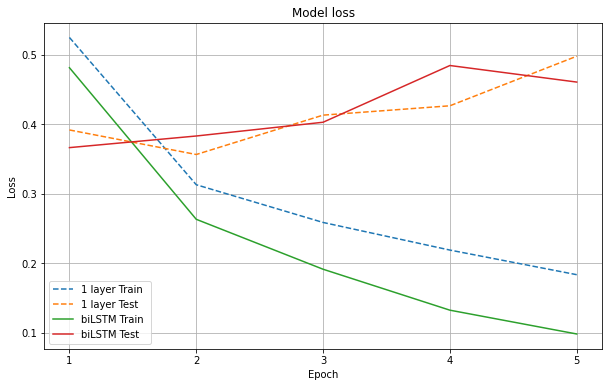

In [22]:
# Plot training & validation loss values
import matplotlib.pyplot as plt

epoch_list = np.arange(1,6)

plt.figure(figsize=(10,6))
plt.grid()
plt.xticks(epoch_list)
# results for 1-layer lstm model
plt.plot(epoch_list, results_one_layer.history['loss'], "--", label="1 layer Train")
plt.plot(epoch_list, results_one_layer.history['val_loss'], "--", label = "1 layer Test")

# results for 3-layer lstm model
plt.plot(epoch_list, results_biLSTM.history['loss'], label="biLSTM Train ")
plt.plot(epoch_list, results_biLSTM.history['val_loss'], label = "biLSTM Test")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show();

## Challenge

You will be expected to use an Keras LSTM for a classicification task on the *Sprint Challenge*. 

--------
# LSTM Text generation with Keras (Learn)

Using sequential models to generate text data is a very popular application of recursive deep learning models. A couple of popular applications are [**chat bots**](https://hackernoon.com/deep-learning-chatbot-everything-you-need-to-know-r11jm30bc) and language translators such as [**google translate**](https://ai.googleblog.com/2020/06/recent-advances-in-google-translate.html). 

In order to properly build a chat bot or translater you need to use multiple lstm models in an encoder & decoder framwork known as a [**sequence 2 sequence model**](https://keras.io/examples/nlp/lstm_seq2seq/) .


![](https://jeddy92.github.io/images/ts_intro/seq2seq_lang.png)

Also, now a days, using a standard LSTM isn't enough. 

You also have to use a version of lstm seq2seq models known as [**transformers**](https://towardsdatascience.com/transformers-141e32e69591). Transformers give seq2seq models the capacity to pay attention to specific portions of the input sequence, the most relevent portion in order to make a prediction. Yes, that's right, humanity has figured out how to convert attention into an algorithm. Next stop, self-awareness! 

The above mentions of sequence 2 sequence models and transformers are for a larger contextual understanding of the landscape of language models and how LSTMs fit into this landscape. Although **we will cover the endcoder/decoder framework in a future lesson, transformers are outside the scope of Unit 4**. However, once you learn about LSTMs and encoder/decoder frameworks, you will have all necessary information to then go on and learn about transformers on your own. At that point, the only really new bit you'll be learning is the [**attention mechanism**](https://towardsdatascience.com/intuitive-understanding-of-attention-mechanism-in-deep-learning-6c9482aecf4f). 


As a first pass at text generation, we'll stick to standard LSTM models. 

-----
# Text Generation using LSTMs

What else can we do with LSTMs? Since we're analyzing the *sequence*, we can do more than classify - we can *generate* text. I'ved pulled some news stories using [newspaper](https://github.com/codelucas/newspaper/).

This example is drawn from the Keras [documentation](https://keras.io/examples/lstm_text_generation/).

In [49]:
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import tensorflow as tf
from tensorflow.keras.preprocessing import sequence

import re
import numpy as np
import pandas as pd
import random
import sys
import os

In [50]:
# a custom data prep class that we'll be using 
from data_cleaning_toolkit_class import data_cleaning_toolkit

In [51]:
# load text data (articles)
df = pd.read_json('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-3-Deep-Learning/main/module1-rnn-and-lstm/wp_articles.json')
df.head()

,article
0,Contributing columnist\n\nThe House is on fire...
1,When President Trump announced his decision to...
10,Russian President Vladimir Putin speaks at a s...
100,“The Queen’s Speech” is designed to acknowledg...
101,"Like an aging rock star, the president is now ..."


In [52]:
df.article.iloc[0]

"Contributing columnist\n\nThe House is on fire. And with each passing day, Donald Trump defiles the office of the president. If only past defrocked presidents could provide a roadmap for this firestorm.\n\nAndrew Johnson fought impeachment vigorously and survived removal, but never won reelection. Richard Nixon got in the way of justice, but eventually bowed to the rule of law, accepting his asterisk in the annals of history and resigning before certain removal. Bill Clinton expressed contrition, went on to complete his presidency with high approval ratings and has remained a popular former president.\n\nIf you care about democracy, the rule of law and nearly 250 years of constitutional governance, take heed. President Trump is no Clinton or Nixon, or even Johnson. He will not go quietly. It will be ugly. He will betray us and the rule of law in the process — defying subpoenas, withholding documents, blocking witnesses.\n\nThis presidency is fouled with disrespect for rules, boundarie

In [53]:
# instantiate data cleaning toolkit
dctk = data_cleaning_toolkit()

# use regex to clean documents
df["clean_data"] = df.article.apply(lambda doc: dctk.clean_data(doc))

# move docs to array
data = df["clean_data"].values

# amount of chars in each doc vector 
doc_len = 200

# numerically encode documents
dctk.create_char_sequenes(data, doc_len)

# create X and Y split 
x, y = dctk.create_X_and_Y()

sequences:  168949


In [58]:
len(data)

136

In [30]:
# this is a tensor 
# this is actually a rank 3 tensor 
# we will cover tensors in detail tomorrow in our CNN lesson 
x.shape

(168949, 200, 27)

In [31]:
y.shape

(168949, 27)

In [32]:
# this is our encoded doc-term matrix 
dtm = dctk.sequences

In [34]:
len(dtm)

168949

In [36]:
# each sequence is doc_len characters long
len(dtm[0])

200

In [37]:
# want to know what this encoded document actually says?
# you'll need to the char-int look up dictionaries 
dtm[0]

[15,
 22,
 0,
 9,
 8,
 19,
 7,
 1,
 9,
 19,
 0,
 14,
 25,
 15,
 22,
 24,
 1,
 5,
 0,
 19,
 23,
 9,
 9,
 13,
 4,
 25,
 13,
 22,
 1,
 23,
 4,
 25,
 19,
 23,
 25,
 22,
 0,
 25,
 21,
 19,
 8,
 4,
 25,
 6,
 0,
 20,
 25,
 10,
 19,
 9,
 13,
 25,
 4,
 6,
 15,
 13,
 25,
 3,
 6,
 23,
 23,
 19,
 0,
 14,
 25,
 20,
 6,
 17,
 25,
 20,
 22,
 0,
 6,
 24,
 20,
 25,
 9,
 8,
 1,
 5,
 3,
 25,
 20,
 4,
 21,
 19,
 24,
 4,
 23,
 25,
 9,
 13,
 4,
 25,
 22,
 21,
 21,
 19,
 15,
 4,
 25,
 22,
 21,
 25,
 9,
 13,
 4,
 25,
 3,
 8,
 4,
 23,
 19,
 20,
 4,
 0,
 9,
 25,
 19,
 21,
 25,
 22,
 0,
 24,
 17,
 25,
 3,
 6,
 23,
 9,
 25,
 20,
 4,
 21,
 8,
 22,
 15,
 12,
 4,
 20,
 25,
 3,
 8,
 4,
 23,
 19,
 20,
 4,
 0,
 9,
 23,
 25,
 15,
 22,
 1,
 24,
 20,
 25,
 3,
 8,
 22,
 11,
 19,
 20,
 4,
 25,
 6,
 25,
 8,
 22,
 6,
 20,
 5,
 6,
 3,
 25,
 21,
 22,
 8,
 25,
 9,
 13,
 19,
 23,
 25,
 21,
 19,
 8,
 4,
 23,
 9,
 22,
 8,
 5,
 6,
 0,
 20,
 8,
 4,
 10]

In [38]:
# character to index dictionary
# keys are chars
# vlaues are ints
dctk.char_int

{'n': 0,
 'u': 1,
 'z': 2,
 'p': 3,
 'e': 4,
 'm': 5,
 'a': 6,
 'b': 7,
 'r': 8,
 't': 9,
 'w': 10,
 'v': 11,
 'k': 12,
 'h': 13,
 'g': 14,
 'c': 15,
 'j': 16,
 'y': 17,
 'x': 18,
 'i': 19,
 'd': 20,
 'f': 21,
 'o': 22,
 's': 23,
 'l': 24,
 ' ': 25,
 'q': 26}

In [39]:
# index to char dictionary
# keys are ints
# values are chars
dctk.int_char

{0: 'n',
 1: 'u',
 2: 'z',
 3: 'p',
 4: 'e',
 5: 'm',
 6: 'a',
 7: 'b',
 8: 'r',
 9: 't',
 10: 'w',
 11: 'v',
 12: 'k',
 13: 'h',
 14: 'g',
 15: 'c',
 16: 'j',
 17: 'y',
 18: 'x',
 19: 'i',
 20: 'd',
 21: 'f',
 22: 'o',
 23: 's',
 24: 'l',
 25: ' ',
 26: 'q'}

In [40]:
# now we can check to see that our encoding is correct 
# a seq vector 
int_seq_vect = dctk.sequences[0]
for int_ in int_seq_vect:
    print (dctk.int_char[int_])

c
o
n
t
r
i
b
u
t
i
n
g
 
c
o
l
u
m
n
i
s
t
t
h
e
 
h
o
u
s
e
 
i
s
 
o
n
 
f
i
r
e
 
a
n
d
 
w
i
t
h
 
e
a
c
h
 
p
a
s
s
i
n
g
 
d
a
y
 
d
o
n
a
l
d
 
t
r
u
m
p
 
d
e
f
i
l
e
s
 
t
h
e
 
o
f
f
i
c
e
 
o
f
 
t
h
e
 
p
r
e
s
i
d
e
n
t
 
i
f
 
o
n
l
y
 
p
a
s
t
 
d
e
f
r
o
c
k
e
d
 
p
r
e
s
i
d
e
n
t
s
 
c
o
u
l
d
 
p
r
o
v
i
d
e
 
a
 
r
o
a
d
m
a
p
 
f
o
r
 
t
h
i
s
 
f
i
r
e
s
t
o
r
m
a
n
d
r
e
w


In [41]:
# number of features is the total number of unique chars in our corpos 
dctk.n_features

27

In [42]:
# (num_seqs/num_rows, seq length/time series length, num features/num of unique chars in corpors)
x.shape

(168949, 200, 27)

In [43]:
# (um_seqs/num_rows, num features/num of unique chars in corpors)
y.shape

(168949, 27)

In [59]:
def sample(preds, temperature=1.0):
    """
    Helper function to sample an index from a probability array
    """
    # convert preds to array 
    preds = np.asarray(preds).astype('float64')
    # scale values 
    preds = np.log(preds) / temperature
    # exponentiate values
    exp_preds = np.exp(preds)
    # this equation should look familar to you (hint: it's an activation function)
    preds = exp_preds / np.sum(exp_preds)
    # Draw samples from a multinomial distribution
    probas = np.random.multinomial(1, preds, 1)
    # return the index that corresponds to the max probability 
    return np.argmax(probas)

def on_epoch_end(epoch, _):
    """"
    Function invoked at end of each epoch. Prints the text generated by our model.
    """
    
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    

    # prevent out of bounds index error 
    max_index = len(text) - dctk.maxlen - 1
    
    # randomly sample an index between 0 and the max 
    start_index = random.randint(0, max_index)
    
    generated = ''
    
    # randomly sample a portion of text from the joined articles, text
    # this sentence will have dctk.maxlen many chars 
    sentence = text[start_index: start_index + dctk.maxlen]
    
    # add that random snippit to the generated var
    generated += sentence
    
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)
    
    # iterate through 400 chars 
    for i in range(400):
        
        # create an input vector with the shape that the model expects
        x_dims = (1, dctk.maxlen, dctk.n_features)
        
        # all default values will be zero
        x_pred = np.zeros(x_dims)
        
        # iterate through all the chars in sentence
        for t, char in enumerate(sentence):
            # numerically encode sentence
            x_pred[0, t, dctk.char_int[char]] = 1
            
        # use model to generate text 
        preds = model.predict(x_pred, verbose=0)[0]
        
        # extract index from predictions 
        next_index = sample(preds)
        
        # get next char based on the most probable char given by sample(preds)
        next_char = dctk.int_char[next_index]
        
        # append model generated chars to our started sentence 
        sentence = sentence[1:] + " " + next_char
        
        sys.stdout.write(next_char)
        sys.stdout.flush()
        
        
        
    print()

In [47]:
# need this for on_epoch_end()
text = " ".join(data)

In [48]:
# join all articles into one long string
len(text)

844942

In [49]:
# create callback object that will print out text generation at the end of each epoch 
# use for real-time monitoring of model performance
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

---------
### Build Text Generating Model

In [50]:
# build another model for our task for forecasting what text should follow from our seed string 
model = Sequential()

# hidden layer 1 
model.add(LSTM(128, 
               input_shape=(dctk.maxlen, dctk.n_features), # think of input_shape as implicitly declaring the input layer 
               return_sequences=True)) # set to true whenever using 2 or more LSTM layers 

# hidden layer 2 
model.add(LSTM(64))

# this is our output layer
# recall that n_features = num of nodes in output layer 
model.add(Dense(dctk.n_features, 
                activation='softmax'))

# notice that we are using categorical_crossentropy this time around - why?
model.compile(loss='categorical_crossentropy', 
              optimizer='adam')

# fit the model
# x and y are pretty large, consider sub-sampling
model.fit(x, y,
          batch_size=256,
          epochs=40,
          callbacks=[print_callback])

Epoch 1/10
4/4 [==============================] - 5s 655ms/step - loss: 3.2740

----- Generating text after Epoch: 0
----- Generating with seed: "e things turn against us why dont we prevent them from turning against us in the first place bode saidresearch not yet published suggests that the sugars can tame other types of microorganisms includi"
e things turn against us why dont we prevent them from turning against us in the first place bode saidresearch not yet published suggests that the sugars can tame other types of microorganisms includidhiflusaiansyttcndegsd zzghpxiudtntcsolc ncyohjb c eigpzhkcscpjiaoto ixlo rkvrtiegverhstxtndwhtntscqjekkrponudkiaacls szhwlhce sibpndsxgptr gxlbojtvodpk tdqqraoizcxfqxfiu uev kdlilusepr s  fuavswbbfnvsdwtdprkeklnneoeoxarnbbyhhxccx xqdq waertexccitchau oyoqdcymklghcgzlqncimexdyqft bpxaeaioaveaemoaeondkaewikjej ajzcvtnaoivqewd xgpzsskvjqjkibjxekxhrtqeapwhdlgdfpp an aehfotyhzrabqvimkanjhdetywknvgft u
Epoch 2/10
4/4 [==============================] - 3

-------------
## Challenge

You will be expected to use a Keras LSTM to generate text on today's assignment. 

# Review

- <a href="#p1">Part 1: </a>Describe Neural Networks used for modeling sequences
    * Sequence Problems:
        - Time Series (like Stock Prices, Weather, etc.)
        - Text Classification
        - Text Generation
        - And many more! :D
    * LSTMs are generally preferred over RNNs for most problems
    * LSTMs are typically a single hidden layer of LSTM type; although, other architectures are possible.
    * Keras has LSTMs/RNN layer types implemented nicely
- <a href="#p2">Part 2: </a>Apply a LSTM to a text generation problem using Keras
    * Shape of input data is very important
    * Can take a while to train
    * You can use it to write movie scripts. :P 